In [637]:
#ML Project

Dataset: Heart Disease Dataset
Source: Kaggle

In [638]:
import pandas as pd

In [639]:
df = pd.read_csv(r'Dataset\raw_merged_heart_dataset.csv')

In [640]:
print(df.head())

   age  sex  cp trestbps chol fbs restecg thalachh exang  oldpeak slope ca  \
0   63    1   3      145  233   1       0      150     0      2.3     0  0   
1   37    1   2      130  250   0       1      187     0      3.5     0  0   
2   41    0   1      130  204   0       0      172     0      1.4     2  0   
3   56    1   1      120  236   0       1      178     0      0.8     2  0   
4   57    0   0      120  354   0       1      163     1      0.6     2  0   

  thal  target  
0    1       1  
1    2       1  
2    2       1  
3    2       1  
4    2       1  


In [641]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2181 entries, 0 to 2180
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       2181 non-null   int64  
 1   sex       2181 non-null   int64  
 2   cp        2181 non-null   int64  
 3   trestbps  2181 non-null   object 
 4   chol      2181 non-null   object 
 5   fbs       2181 non-null   object 
 6   restecg   2181 non-null   object 
 7   thalachh  2181 non-null   object 
 8   exang     2181 non-null   object 
 9   oldpeak   2181 non-null   float64
 10  slope     2181 non-null   object 
 11  ca        2181 non-null   object 
 12  thal      2181 non-null   object 
 13  target    2181 non-null   int64  
dtypes: float64(1), int64(4), object(9)
memory usage: 238.7+ KB
None


In [642]:
print(df.describe())

               age          sex           cp      oldpeak       target
count  2181.000000  2181.000000  2181.000000  2181.000000  2181.000000
mean     53.477762     0.693260     1.507565     0.990509     0.496103
std       9.194787     0.461246     1.371587     1.141851     0.500099
min      28.000000     0.000000     0.000000     0.000000     0.000000
25%      46.000000     0.000000     0.000000     0.000000     0.000000
50%      54.000000     1.000000     2.000000     0.600000     0.000000
75%      60.000000     1.000000     2.000000     1.600000     1.000000
max      77.000000     1.000000     4.000000     6.200000     1.000000


In [643]:
print(df.isnull().sum())

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalachh    0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64


Although the code says there are no missing values, while exploring the dataset manually I noticed that the missing values are marked as ? so I will go through each feature and see what are the distinct values and if there are any ?

In [644]:
age_question_marks = (df['age'] == '?').sum()
print(f"Number of '?' in the 'age' column: {age_question_marks}")

Number of '?' in the 'age' column: 0


In [645]:
sex_question_marks = (df['sex'] == '?').sum()
print(f"Number of '?' in the 'sex' column: {sex_question_marks}")

Number of '?' in the 'sex' column: 0


In [646]:
cp_question_marks = (df['cp'] == '?').sum()
print(f"Number of '?' in the 'cp' column: {cp_question_marks}")

Number of '?' in the 'cp' column: 0


In [647]:
trestbps_question_marks = (df['trestbps'] == '?').sum()
print(f"Number of '?' in the 'trestbps' column: {trestbps_question_marks}")

Number of '?' in the 'trestbps' column: 1


In [648]:
for column in df.columns:
    question_mark_count = (df[column] == '?').sum()
    print(f"Number of '?' in the '{column}' column: {question_mark_count}")

Number of '?' in the 'age' column: 0
Number of '?' in the 'sex' column: 0
Number of '?' in the 'cp' column: 0
Number of '?' in the 'trestbps' column: 1
Number of '?' in the 'chol' column: 23
Number of '?' in the 'fbs' column: 8
Number of '?' in the 'restecg' column: 1
Number of '?' in the 'thalachh' column: 1
Number of '?' in the 'exang' column: 1
Number of '?' in the 'oldpeak' column: 0
Number of '?' in the 'slope' column: 190
Number of '?' in the 'ca' column: 291
Number of '?' in the 'thal' column: 266
Number of '?' in the 'target' column: 0


While manually exploring the data I noticed some other unexpected values, so I will chack for those as well

In [649]:
for column in df.columns:
    unique_values = df[column].unique()
    print(f"Unique values in the '{column}' column: {unique_values}")

Unique values in the 'age' column: [63 37 41 56 57 44 52 54 48 49 64 58 50 66 43 69 59 42 61 40 71 51 65 53
 46 45 39 47 62 34 35 29 55 60 67 68 74 76 70 38 77 28 30 31 32 33 36]
Unique values in the 'sex' column: [1 0]
Unique values in the 'cp' column: [3 2 1 0 4]
Unique values in the 'trestbps' column: ['145' '130' '120' '140' '172' '150' '110' '135' '160' '105' '125' '142'
 '155' '104' '138' '128' '108' '134' '122' '115' '118' '100' '124' '94'
 '112' '102' '152' '101' '132' '148' '178' '129' '180' '136' '126' '106'
 '156' '170' '146' '117' '200' '165' '174' '192' '144' '123' '154' '114'
 '164' '98' '190' '?' '113' '92' '158']
Unique values in the 'chol' column: ['233' '250' '204' '236' '354' '192' '294' '263' '199' '168' '239' '275'
 '266' '211' '283' '219' '340' '226' '247' '234' '243' '302' '212' '175'
 '417' '197' '198' '177' '273' '213' '304' '232' '269' '360' '308' '245'
 '208' '264' '321' '325' '235' '257' '216' '256' '231' '141' '252' '201'
 '222' '260' '182' '303' '265' '309

Apart from ? there are some other unexpected values. cp has a value of 4 when the values for that feature should be 0,1,2,3. 

Slope has value of 3 when the expected values are 0,1,2

ca has value 4 when expected values are 0,1,2,3
thal expected values are 1,2,3 and there are values 6 and 7

In [650]:
expected_values = {
    'cp': [0, 1, 2, 3],
    'slope': [0, 1, 2],
    'ca': [0, 1, 2, 3],
    'thal': [1, 2, 3]
}

#To count the unexpected values that I previously found
def count_unexpected(df, column, valid_values):
    unexpected_count = df[column][~df[column].isin(valid_values)].value_counts()
    return unexpected_count

#Check each specified column
for column, valid_values in expected_values.items():
    print(f"Unexpected values in the '{column}' column: {count_unexpected(df, column, valid_values)}")

Unexpected values in the 'cp' column: cp
4    252
Name: count, dtype: int64
Unexpected values in the 'slope' column: slope
2    964
1    894
?    190
0    114
3     19
Name: count, dtype: int64
Unexpected values in the 'ca' column: ca
0    1086
1     410
?     291
2     239
3     127
4      28
Name: count, dtype: int64
Unexpected values in the 'thal' column: thal
2    874
3    795
?    266
7    115
1     96
6     24
0     11
Name: count, dtype: int64


Unexpected values:

cp: 252 rows of value 4

slope: 19 rows of value 3

ca: 28 rows of value 4

thal: 11 rows of value 0

thal: 24 rows of value 6

thal: 115 rows of value 7


In [651]:
# I imported all of the individual datasets so i can preprocess them and merge them properly
df1 = pd.read_csv(r'C:\Users\elida\OneDrive\Desktop\Uni-Master 2024\ML\ProjectML\Datasets-to-merge\heart.csv')
df2 = pd.read_csv(r'C:\Users\elida\OneDrive\Desktop\Uni-Master 2024\ML\ProjectML\Datasets-to-merge\heart2.csv')
df3 = pd.read_csv(r'C:\Users\elida\OneDrive\Desktop\Uni-Master 2024\ML\ProjectML\Datasets-to-merge\Heart_Disease_Prediction3.csv')
df4 = pd.read_csv(r'C:\Users\elida\OneDrive\Desktop\Uni-Master 2024\ML\ProjectML\Datasets-to-merge\data4.csv')
df5 = pd.read_csv(r'C:\Users\elida\OneDrive\Desktop\Uni-Master 2024\ML\ProjectML\Datasets-to-merge\heart5.csv')

In [652]:
# To see all of the features
print(df1.columns.tolist())
# To see the features of the og dataset
print(df.columns.tolist())

['age', 'sex', 'cp', 'trtbps', 'chol', 'fbs', 'restecg', 'thalachh', 'exng', 'oldpeak', 'slp', 'caa', 'thall', 'output']
['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalachh', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target']


In [653]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trtbps    303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalachh  303 non-null    int64  
 8   exng      303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slp       303 non-null    int64  
 11  caa       303 non-null    int64  
 12  thall     303 non-null    int64  
 13  output    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [654]:
# List of features to check 
features = ['cp', 'fbs', 'restecg', 'exng', 'slp', 'caa', 'thall', 'output']
for feature in features:
    print(f"Distinct values in {feature}: {df1[feature].unique()}")

Distinct values in cp: [3 2 1 0]
Distinct values in fbs: [1 0]
Distinct values in restecg: [0 1 2]
Distinct values in exng: [0 1]
Distinct values in slp: [0 2 1]
Distinct values in caa: [0 2 1 3 4]
Distinct values in thall: [1 2 3 0]
Distinct values in output: [1 0]


I need to check the same thing in the other datasets. caa has value 4 which is not intended. Thall shouldn't have the value 0.

In [655]:
caa_counts = df1['caa'].value_counts()
count_of_four = caa_counts.get(4, 0)

total_instances = len(df1)
print(f"'4' appears {count_of_four} times in 'caa' out of {total_instances} instances.")

'4' appears 5 times in 'caa' out of 303 instances.


4 is most likely a mistake made during data entry.

In [656]:
thall_counts = df1['thall'].value_counts()
count_of_zero = thall_counts.get(0, 0)

total_instances = len(df1)
print(f"'0' appears {count_of_zero} times in 'thall' out of {total_instances} instances.")

'0' appears 2 times in 'thall' out of 303 instances.


thall is most likely also a mistake made during data entry.

In [657]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [658]:
#Unique values in Dataset 2
features = ['cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal', 'target']
for feature in features:
    print(f"Distinct values in {feature}: {df2[feature].unique()}")

Distinct values in cp: [0 1 2 3]
Distinct values in fbs: [0 1]
Distinct values in restecg: [1 0 2]
Distinct values in exang: [0 1]
Distinct values in slope: [2 0 1]
Distinct values in ca: [2 0 1 3 4]
Distinct values in thal: [3 2 1 0]
Distinct values in target: [0 1]


caa shouldn't have the value 4 and thal shouldn't have the value 0.

In [659]:
caa_counts = df2['ca'].value_counts()
count_of_four = caa_counts.get(4, 0)

total_instances = len(df2)
print(f"'4' appears {count_of_four} times in 'ca' out of {total_instances} instances.")

'4' appears 18 times in 'ca' out of 1025 instances.


In [660]:
thall_counts = df2['thal'].value_counts()
count_of_zero = thall_counts.get(0, 0)

total_instances = len(df2)
print(f"'0' appears {count_of_zero} times in 'thal' out of {total_instances} instances.")

'0' appears 7 times in 'thal' out of 1025 instances.


Both 4 in ca and 0 in thal are probably mistakes made during data entery.

In [661]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 270 entries, 0 to 269
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Age                      270 non-null    int64  
 1   Sex                      270 non-null    int64  
 2   Chest pain type          270 non-null    int64  
 3   BP                       270 non-null    int64  
 4   Cholesterol              270 non-null    int64  
 5   FBS over 120             270 non-null    int64  
 6   EKG results              270 non-null    int64  
 7   Max HR                   270 non-null    int64  
 8   Exercise angina          270 non-null    int64  
 9   ST depression            270 non-null    float64
 10  Slope of ST              270 non-null    int64  
 11  Number of vessels fluro  270 non-null    int64  
 12  Thallium                 270 non-null    int64  
 13  Heart Disease            270 non-null    object 
dtypes: float64(1), int64(12), 

In [662]:
features = ['Chest pain type', 'FBS over 120', 'EKG results', 'Exercise angina', 'Slope of ST', 'Number of vessels fluro', 'Thallium', 'Heart Disease']
for feature in features:
    print(f"Distinct values in {feature}: {df3[feature].unique()}")

Distinct values in Chest pain type: [4 3 2 1]
Distinct values in FBS over 120: [0 1]
Distinct values in EKG results: [2 0 1]
Distinct values in Exercise angina: [0 1]
Distinct values in Slope of ST: [2 1 3]
Distinct values in Number of vessels fluro: [3 0 1 2]
Distinct values in Thallium: [3 7 6]
Distinct values in Heart Disease: ['Presence' 'Absence']


For dataset 3 I need to change the chest pain to go form 0-3 instead of 1-4. Change slope values from 1-3 to 0-2. Change thal values from 3,6,7 to 1-3. Change presence and absence to 1 and 0.

In [663]:
# changing the values from 1-4 to 0-3
replacement_map = {
    1: 0,
    2: 1,
    3: 2,
    4: 3
}
df3['Chest pain type'] = df3['Chest pain type'].replace(replacement_map)

In [664]:
print(df3['Chest pain type'].value_counts())

Chest pain type
3    129
2     79
1     42
0     20
Name: count, dtype: int64


In [665]:
# changing the values from 1-3 to 0-2 of slope feature
replacement_map = {
    1: 0,
    2: 1,
    3: 2
}
df3['Slope of ST'] = df3['Slope of ST'].replace(replacement_map)

In [666]:
print(df3['Slope of ST'].value_counts())

Slope of ST
0    130
1    122
2     18
Name: count, dtype: int64


In [667]:
# changing the values 3->1, 6->2, 7->3 for Thallium feature
replacement_map = {
    3: 1,
    6: 2,
    7: 3
}
df3['Thallium'] = df3['Thallium'].replace(replacement_map)
print(df3['Thallium'].value_counts())

Thallium
1    152
3    104
2     14
Name: count, dtype: int64


In [668]:
# changing the values Heart Disease feature
replacement_map = {
    'Presence': 1,
    'Absence': 0
}
df3['Heart Disease'] = df3['Heart Disease'].replace(replacement_map)
print(df3['Heart Disease'].value_counts())

Heart Disease
0    150
1    120
Name: count, dtype: int64


C:\Users\elida\AppData\Local\Temp\ipykernel_5424\2247834156.py:6: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df3['Heart Disease'] = df3['Heart Disease'].replace(replacement_map)


In [669]:
features = ['Chest pain type', 'FBS over 120', 'EKG results', 'Exercise angina', 'Slope of ST', 'Number of vessels fluro', 'Thallium', 'Heart Disease']
for feature in features:
    print(f"Distinct values in {feature}: {df3[feature].unique()}")

Distinct values in Chest pain type: [3 2 1 0]
Distinct values in FBS over 120: [0 1]
Distinct values in EKG results: [2 0 1]
Distinct values in Exercise angina: [0 1]
Distinct values in Slope of ST: [1 0 2]
Distinct values in Number of vessels fluro: [3 0 1 2]
Distinct values in Thallium: [1 3 2]
Distinct values in Heart Disease: [1 0]


In [670]:
df4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 294 entries, 0 to 293
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       294 non-null    int64  
 1   sex       294 non-null    int64  
 2   cp        294 non-null    int64  
 3   trestbps  294 non-null    object 
 4   chol      294 non-null    object 
 5   fbs       294 non-null    object 
 6   restecg   294 non-null    object 
 7   thalach   294 non-null    object 
 8   exang     294 non-null    object 
 9   oldpeak   294 non-null    float64
 10  slope     294 non-null    object 
 11  ca        294 non-null    object 
 12  thal      294 non-null    object 
 13  num       294 non-null    int64  
dtypes: float64(1), int64(4), object(9)
memory usage: 32.3+ KB


In [671]:
features = ['cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal', 'num']
for feature in features:
    print(f"Distinct values in {feature}: {df4[feature].unique()}")

Distinct values in cp: [2 1 3 4]
Distinct values in fbs: ['0' '?' '1']
Distinct values in restecg: ['2' '0' '1' '?']
Distinct values in exang: ['0' '1' '?']
Distinct values in slope: ['?' '2' '1' '3']
Distinct values in ca: ['?' '0']
Distinct values in thal: ['?' '6' '3' '7']
Distinct values in num: [0 1]


We can see a lot of fields have ?, which is a representation of missing values.
Values in cp should go from 0-3 instead of 1-4. Change values in thal from 3,6,7 to 1,2,3.

In [672]:
# changing the values form 1-4 to 0-3 for cp feature
replacement_map = {
    1: 0,
    2: 1,
    3: 2,
    4: 3
}
df4['cp'] = df4['cp'].replace(replacement_map)
print(df4['cp'].value_counts())

cp
3    123
1    106
2     54
0     11
Name: count, dtype: int64


In [673]:
# changing the values 3->1, 6->2, 7->3 for thal feature
replacement_map = {
    3: 1,
    6: 2,
    7: 3
}
df4['thal'] = df4['thal'].replace(replacement_map)
print(df4['thal'].value_counts())

thal
?    266
7     11
6     10
3      7
Name: count, dtype: int64


So the code above didn't work because I didn't address the ? values.

In [674]:
import numpy as np

In [675]:
# I change ? to be NaN value 
df4['thal'] = df4['thal'].replace('?', np.nan)
# to make sure that the column is a numaric type after changing ? to NaN
df4['thal'] = pd.to_numeric(df4['thal'], errors='coerce')
replacement_map = {
    3: 1,
    6: 2,
    7: 3
}
df4['thal'] = df4['thal'].replace(replacement_map)
print(df4['thal'].value_counts())

thal
3.0    11
2.0    10
1.0     7
Name: count, dtype: int64


In [676]:
df5.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 289 entries, 0 to 288
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       289 non-null    int64  
 1   sex       289 non-null    int64  
 2   cp        289 non-null    int64  
 3   trtbps    289 non-null    int64  
 4   chol      289 non-null    int64  
 5   fbs       289 non-null    int64  
 6   restecg   289 non-null    int64  
 7   thalachh  289 non-null    int64  
 8   exng      289 non-null    int64  
 9   oldpeak   289 non-null    float64
 10  slp       289 non-null    int64  
 11  caa       289 non-null    int64  
 12  thall     289 non-null    int64  
 13  output    289 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 31.7 KB


In [677]:
features = ['cp', 'fbs', 'restecg', 'exng', 'slp', 'caa', 'thall', 'output']
for feature in features:
    print(f"Distinct values in {feature}: {df5[feature].unique()}")

Distinct values in cp: [3 2 1 0]
Distinct values in fbs: [1 0]
Distinct values in restecg: [0 1 2]
Distinct values in exng: [0 1]
Distinct values in slp: [0 2 1]
Distinct values in caa: [0 2 1 3 4]
Distinct values in thall: [1 2 3 0]
Distinct values in output: [1 0]


4 in caa is unexpected, the values go from 0-3. thal should go from 1-3

In [678]:
print(df5['caa'].value_counts())

caa
0    170
1     61
2     34
3     19
4      5
Name: count, dtype: int64


In [679]:
caa = df5['caa'].value_counts()
count_of_four = caa.get(4, 0)

total_instances = len(df5)
print(f"'4' appears {count_of_four} times in 'caa' out of {total_instances} instances.")

'4' appears 5 times in 'caa' out of 289 instances.


Value 4 in caa is most likely a mistake made during data entery

In [680]:
thall_counts = df5['thall'].value_counts()
count_of_zero = thall_counts.get(0, 0)

total_instances = len(df5)
print(f"'0' appears {count_of_zero} times in 'thall' out of {total_instances} instances.")

'0' appears 2 times in 'thall' out of 289 instances.


It appears that the 0 is probbably just an error that happened during input.

In [681]:
df1.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trtbps    303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalachh  303 non-null    int64  
 8   exng      303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slp       303 non-null    int64  
 11  caa       303 non-null    int64  
 12  thall     303 non-null    int64  
 13  output    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [682]:
df2.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [683]:
df3.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 270 entries, 0 to 269
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Age                      270 non-null    int64  
 1   Sex                      270 non-null    int64  
 2   Chest pain type          270 non-null    int64  
 3   BP                       270 non-null    int64  
 4   Cholesterol              270 non-null    int64  
 5   FBS over 120             270 non-null    int64  
 6   EKG results              270 non-null    int64  
 7   Max HR                   270 non-null    int64  
 8   Exercise angina          270 non-null    int64  
 9   ST depression            270 non-null    float64
 10  Slope of ST              270 non-null    int64  
 11  Number of vessels fluro  270 non-null    int64  
 12  Thallium                 270 non-null    int64  
 13  Heart Disease            270 non-null    int64  
dtypes: float64(1), int64(13)
m

In [684]:
df4.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 294 entries, 0 to 293
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       294 non-null    int64  
 1   sex       294 non-null    int64  
 2   cp        294 non-null    int64  
 3   trestbps  294 non-null    object 
 4   chol      294 non-null    object 
 5   fbs       294 non-null    object 
 6   restecg   294 non-null    object 
 7   thalach   294 non-null    object 
 8   exang     294 non-null    object 
 9   oldpeak   294 non-null    float64
 10  slope     294 non-null    object 
 11  ca        294 non-null    object 
 12  thal      28 non-null     float64
 13  num       294 non-null    int64  
dtypes: float64(2), int64(4), object(8)
memory usage: 32.3+ KB


In [685]:
df5.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 289 entries, 0 to 288
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       289 non-null    int64  
 1   sex       289 non-null    int64  
 2   cp        289 non-null    int64  
 3   trtbps    289 non-null    int64  
 4   chol      289 non-null    int64  
 5   fbs       289 non-null    int64  
 6   restecg   289 non-null    int64  
 7   thalachh  289 non-null    int64  
 8   exng      289 non-null    int64  
 9   oldpeak   289 non-null    float64
 10  slp       289 non-null    int64  
 11  caa       289 non-null    int64  
 12  thall     289 non-null    int64  
 13  output    289 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 31.7 KB


Now to change the column/feature names so everything matches.

In [686]:
# Changing the feature names for data frame 1 which is the first dataset
# I changed the names to be the same as the one in dataset 2
df1.rename(columns={
    'trtbps': 'trestbps',
    'thalachh': 'thalach',
    'exng': 'exang',
    'slp': 'slope',
    'caa': 'ca',
    'thall': 'thal',
    'output': 'target'
}, inplace=True)

In [687]:
# Changing the feature names for data frame 3 which is the third dataset
df3.rename(columns={
    'Age': 'age',
    'Sex': 'sex',
    'Chest pain type': 'cp',
    'BP': 'trestbps',
    'Cholesterol': 'chol',
    'FBS over 120': 'fbs',
    'EKG results': 'restecg',
    'Max HR': 'thalach',
    'Exercise angina': 'exang',
    'ST depression': 'oldpeak',
    'Slope of ST': 'slope',
    'Number of vessels fluro': 'ca',
    'Thallium': 'thal',
    'Heart Disease': 'target'
}, inplace=True)

In [688]:
# Changing the feature names for data frame 4 which is the fourth dataset
df4.rename(columns={
    'num': 'target'
}, inplace=True)

In [689]:
# Changing the feature names for data frame 5 which is the fifth dataset
df5.rename(columns={
    'trtbps': 'trestbps',
    'thalachh': 'thalach',
    'exng': 'exang',
    'slp': 'slope',
    'caa': 'ca',
    'thall': 'thal',
    'output': 'target'
}, inplace=True)

In [690]:
df4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 294 entries, 0 to 293
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       294 non-null    int64  
 1   sex       294 non-null    int64  
 2   cp        294 non-null    int64  
 3   trestbps  294 non-null    object 
 4   chol      294 non-null    object 
 5   fbs       294 non-null    object 
 6   restecg   294 non-null    object 
 7   thalach   294 non-null    object 
 8   exang     294 non-null    object 
 9   oldpeak   294 non-null    float64
 10  slope     294 non-null    object 
 11  ca        294 non-null    object 
 12  thal      28 non-null     float64
 13  target    294 non-null    int64  
dtypes: float64(2), int64(4), object(8)
memory usage: 32.3+ KB


In [691]:
print("Features in df1:", df1.columns.tolist())
print("Features in df2:", df2.columns.tolist())
print("Features in df3:", df3.columns.tolist())
print("Features in df4:", df4.columns.tolist())
print("Features in df5:", df5.columns.tolist())

Features in df1: ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target']
Features in df2: ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target']
Features in df3: ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target']
Features in df4: ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target']
Features in df5: ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target']


All of the features have the same name now

In [692]:
#To check if the features in all the data frames have the same range in case I missed some features that need to be transformed
dataframes = [df1, df2, df3, df4, df5]
df_names = ['df1', 'df2', 'df3', 'df4', 'df5']

# This will loop through each df and and tell me the unique values for each feature
for df, name in zip(dataframes, df_names):
    print(f"Unique values in {name}:")
    for column in df.columns:
        print(f"{column}: {df[column].unique()}")
    print()  

Unique values in df1:
age: [63 37 41 56 57 44 52 54 48 49 64 58 50 66 43 69 59 42 61 40 71 51 65 53
 46 45 39 47 62 34 35 29 55 60 67 68 74 76 70 38 77]
sex: [1 0]
cp: [3 2 1 0]
trestbps: [145 130 120 140 172 150 110 135 160 105 125 142 155 104 138 128 108 134
 122 115 118 100 124  94 112 102 152 101 132 148 178 129 180 136 126 106
 156 170 146 117 200 165 174 192 144 123 154 114 164]
chol: [233 250 204 236 354 192 294 263 199 168 239 275 266 211 283 219 340 226
 247 234 243 302 212 175 417 197 198 177 273 213 304 232 269 360 308 245
 208 264 321 325 235 257 216 256 231 141 252 201 222 260 182 303 265 309
 186 203 183 220 209 258 227 261 221 205 240 318 298 564 277 214 248 255
 207 223 288 160 394 315 246 244 270 195 196 254 126 313 262 215 193 271
 268 267 210 295 306 178 242 180 228 149 278 253 342 157 286 229 284 224
 206 167 230 335 276 353 225 330 290 172 305 188 282 185 326 274 164 307
 249 341 407 217 174 281 289 322 299 300 293 184 409 259 200 327 237 218
 319 166 311 169 187 1

I will replace ? values to NaN to signify it as missing values

In [693]:
df4.replace("?", np.nan, inplace=True)

In [694]:
df1.info()
df2.info()
df3.info()
df4.info()
df5.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int

Based on the output of the code above, I need to change the following feature types:
- trestbps feature in df4 from object to int64
- chol feature in df4 from object to int64
- fbs feature in df4 from object to int64
- restecg feature in df4 from object to int64
- thalach feature in df4 from object to int64
- examg feature in df4 from object to int64
- slope feature in df4 from object to int64
- ca feature in df4 from object to int64
- thal feature in df4 from float64 to int64

In [695]:
# makes sure that the data in the column is either nan or numerical and othervise makes it nan
df4['trestbps'] = pd.to_numeric(df4['trestbps'], errors='coerce')
# Changing the actual data type of the colum into Int64
df4['trestbps'] = df4['trestbps'].astype('Int64')

# Making sure it worked
print(df4['trestbps'].dtype)
print(df4['trestbps'].unique())

Int64
<IntegerArray>
[ 130,  120,  140,  170,  100,  105,  110,  125,  150,   98,  112,  145,  190,
  160,  115,  142,  180,  132,  135, <NA>,  108,  124,  113,  122,   92,  118,
  106,  200,  138,  136,  128,  155]
Length: 32, dtype: Int64


In [696]:
# I put all of the feature names in a list 
columns_to_convert = ['chol', 'fbs', 'restecg', 'thalach', 'exang', 'slope', 'ca', 'thal']

# The for loop goes through each column in the list and converts it to numeric (coercing errors to NaN), then convert to Int64
for column in columns_to_convert:
    df4[column] = pd.to_numeric(df4[column], errors='coerce')
    df4[column] = df4[column].astype('Int64')

# To check if it worked properly
for column in columns_to_convert:
    print(f"{column} dtype: {df4[column].dtype}")
    print(f"Unique values in {column}: {df4[column].unique()}")

chol dtype: Int64
Unique values in chol: <IntegerArray>
[ 132,  243, <NA>,  237,  219,  198,  225,  254,  298,  161,
 ...
  285,  279,  388,  164,  336,  491,  205,  212,  331,  393]
Length: 154, dtype: Int64
fbs dtype: Int64
Unique values in fbs: <IntegerArray>
[0, <NA>, 1]
Length: 3, dtype: Int64
restecg dtype: Int64
Unique values in restecg: <IntegerArray>
[2, 0, 1, <NA>]
Length: 4, dtype: Int64
thalach dtype: Int64
Unique values in thalach: <IntegerArray>
[ 185,  160,  170,  150,  165,  184,  155,  190,  168,  180,  178,  172,  130,
  142,   98,  158,  129,  146,  145,  120,  106,  132,  140,  138,  167,  188,
  144,  137,  136,  152,  175,  176,  118,  154,  115,  135,  122,  110,   90,
  116,  174,  125, <NA>,  148,  100,  164,  139,  127,  162,  112,  134,  114,
  128,  126,  124,  153,  166,  103,  156,   87,  102,   92,   99,  121,   91,
  108,   96,   82,  105,  143,  119,   94]
Length: 72, dtype: Int64
exang dtype: Int64
Unique values in exang: <IntegerArray>
[0, 1, <NA>]
Le

In [697]:
# Print unique values of 'slope' in each DataFrame
print("Unique values in df1 for 'slope':", df1['slope'].unique())
print("Unique values in df2 for 'slope':", df2['slope'].unique())
print("Unique values in df3 for 'slope':", df3['slope'].unique())
print("Unique values in df4 for 'slope':", df4['slope'].unique())
print("Unique values in df5 for 'slope':", df5['slope'].unique())


Unique values in df1 for 'slope': [0 2 1]
Unique values in df2 for 'slope': [2 0 1]
Unique values in df3 for 'slope': [1 0 2]
Unique values in df4 for 'slope': <IntegerArray>
[<NA>, 2, 1, 3]
Length: 4, dtype: Int64
Unique values in df5 for 'slope': [0 2 1]


I also need to change the values for slope in df4

In [698]:
replacement_map = {
    1: 0,
    2: 1,
    3: 2
}
df4['slope'] = df4['slope'].replace(replacement_map)
print(df4['slope'].value_counts())

slope
1    91
0    12
2     1
Name: count, dtype: Int64


In [699]:
# Print unique values of 'ca' in each DataFrame
print("Unique values in df1 for 'ca':", df1['ca'].unique())
print("Unique values in df2 for 'ca':", df2['ca'].unique())
print("Unique values in df3 for 'ca':", df3['ca'].unique())
print("Unique values in df4 for 'ca':", df4['ca'].unique())
print("Unique values in df5 for 'ca':", df5['ca'].unique())

Unique values in df1 for 'ca': [0 2 1 3 4]
Unique values in df2 for 'ca': [2 0 1 3 4]
Unique values in df3 for 'ca': [3 0 1 2]
Unique values in df4 for 'ca': <IntegerArray>
[<NA>, 0]
Length: 2, dtype: Int64
Unique values in df5 for 'ca': [0 2 1 3 4]


In [700]:
# Print unique values of 'thal' in each DataFrame
print("Unique values in df1 for 'thal':", df1['thal'].unique())
print("Unique values in df2 for 'thal':", df2['thal'].unique())
print("Unique values in df3 for 'thal':", df3['thal'].unique())
print("Unique values in df4 for 'thal':", df4['thal'].unique())
print("Unique values in df5 for 'thal':", df5['thal'].unique())

Unique values in df1 for 'thal': [1 2 3 0]
Unique values in df2 for 'thal': [3 2 1 0]
Unique values in df3 for 'thal': [1 3 2]
Unique values in df4 for 'thal': <IntegerArray>
[<NA>, 2, 1, 3]
Length: 4, dtype: Int64
Unique values in df5 for 'thal': [1 2 3 0]


In [701]:
df1.to_csv('df1.csv', index=False)
df2.to_csv('df2.csv', index=False)
df3.to_csv('df3.csv', index=False)
df4.to_csv('df4.csv', index=False)
df5.to_csv('df5.csv', index=False)

Now that I have converted everything, I will merge the data frames into one using concatination

In [702]:
dataframes = [df1, df2, df3, df4, df5]
merged_df = pd.concat(dataframes, ignore_index=True)


In [703]:
print("Merged DataFrame shape:", merged_df.shape)

Merged DataFrame shape: (2181, 14)


In [704]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2181 entries, 0 to 2180
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       2181 non-null   int64  
 1   sex       2181 non-null   int64  
 2   cp        2181 non-null   int64  
 3   trestbps  2180 non-null   Int64  
 4   chol      2158 non-null   Int64  
 5   fbs       2173 non-null   Int64  
 6   restecg   2180 non-null   Int64  
 7   thalach   2180 non-null   Int64  
 8   exang     2180 non-null   Int64  
 9   oldpeak   2181 non-null   float64
 10  slope     1991 non-null   Int64  
 11  ca        1890 non-null   Int64  
 12  thal      1915 non-null   Int64  
 13  target    2181 non-null   int64  
dtypes: Int64(9), float64(1), int64(4)
memory usage: 257.8 KB


In [705]:
merged_df.to_csv('merged_df.csv', index=False)

In [706]:
missing_values = merged_df.isna().sum()
print(missing_values)

age           0
sex           0
cp            0
trestbps      1
chol         23
fbs           8
restecg       1
thalach       1
exang         1
oldpeak       0
slope       190
ca          291
thal        266
target        0
dtype: int64


In [707]:
total_entries = len(merged_df)
missing_percentages = (merged_df.isna().sum() / total_entries) * 100
print(missing_percentages)

age          0.000000
sex          0.000000
cp           0.000000
trestbps     0.045851
chol         1.054562
fbs          0.366804
restecg      0.045851
thalach      0.045851
exang        0.045851
oldpeak      0.000000
slope        8.711600
ca          13.342503
thal        12.196240
target       0.000000
dtype: float64


None of my features have more than 14% missing data. The feature that has the largest amount of missing data is ca.

In [708]:
# To count how many times 1 and 0 appear in the target feature
class_balance = merged_df['target'].value_counts()

# To calculate the percentage of each class
class_percentage = (class_balance / len(merged_df) * 100)

print("Class balance in the target feature:")
print(class_balance)
print("\nClass balance in the target feature in %:")
print(class_percentage)

Class balance in the target feature:
target
0    1099
1    1082
Name: count, dtype: int64

Class balance in the target feature in %:
target
0    50.389729
1    49.610271
Name: count, dtype: float64


I checked the class balance of the target feature, now I will check for other categorical features.

In [709]:
categorical_features = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal']
for feature in categorical_features:
    class_balance = merged_df[feature].value_counts()
   
    percentages = (class_balance / len(merged_df) * 100).round(2)  
    # I rounded it for beter uniformity
    print(f"Class balance for {feature} (count):")
    print(class_balance)
    print(f"Class balance for {feature} (percentage):")
    print(percentages)
    print("\n")  # Adding a new line for better separation between features

Class balance for sex (count):
sex
1    1512
0     669
Name: count, dtype: int64
Class balance for sex (percentage):
sex
1    69.33
0    30.67
Name: count, dtype: float64


Class balance for cp (count):
cp
0    797
2    590
1    419
3    375
Name: count, dtype: int64
Class balance for cp (percentage):
cp
0    36.54
2    27.05
1    19.21
3    17.19
Name: count, dtype: float64


Class balance for fbs (count):
fbs
0    1873
1     300
Name: count, dtype: Int64
Class balance for fbs (percentage):
fbs
0    85.88
1    13.76
Name: count, dtype: Float64


Class balance for restecg (count):
restecg
0    1152
1     864
2     164
Name: count, dtype: Int64
Class balance for restecg (percentage):
restecg
0    52.82
1    39.61
2     7.52
Name: count, dtype: Float64


Class balance for exang (count):
exang
0    1466
1     714
Name: count, dtype: Int64
Class balance for exang (percentage):
exang
0    67.22
1    32.74
Name: count, dtype: Float64


Class balance for slope (count):
slope
1    965
2    770

In [710]:
merged_df = merged_df.drop(merged_df[merged_df['thal'] == 0].index)

# Verify the operation by checking if there are any rows with 'thal' equal to 0
print("Number of rows with 'thal' equal to 0:", (merged_df['thal'] == 0).sum())
print("Shape of DataFrame after filtering:", merged_df.shape)

Number of rows with 'thal' equal to 0: 0
Shape of DataFrame after filtering: (2170, 14)


In [711]:
print("Number of rows with 'ca' equal to 4:", (merged_df['ca'] == 4).sum())

Number of rows with 'ca' equal to 4: 28


In [712]:
merged_df = merged_df.drop(merged_df[merged_df['ca'] == 4].index)
print("Number of rows with 'ca' equal to 4:", (merged_df['ca'] == 4).sum())

Number of rows with 'ca' equal to 4: 0


In [713]:
merged_df.to_csv('merged_df.csv', index=False)

C:\Users\elida\AppData\Local\Temp\ipykernel_5424\3622980870.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='sex', data=merged_df, palette='bright')


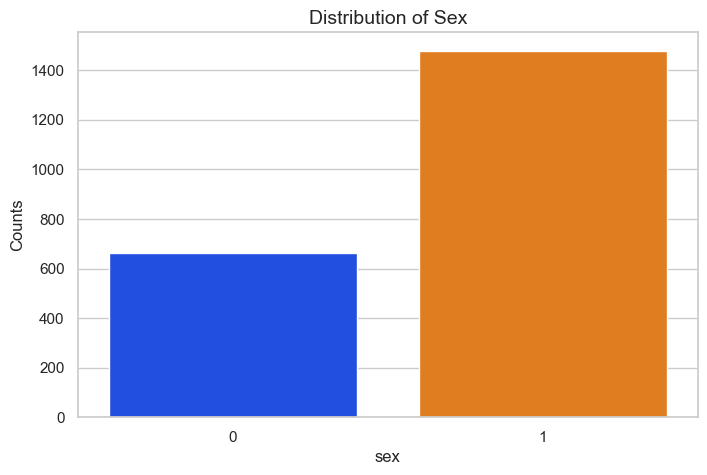

In [719]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")
plt.figure(figsize=(8, 5))
sns.countplot(x='sex', data=merged_df, palette='bright')
plt.title('Distribution of Sex', fontsize=14)
plt.ylabel('Counts', fontsize=12)
plt.show()


C:\Users\elida\AppData\Local\Temp\ipykernel_5424\1901078742.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='cp', data=merged_df, palette='bright')


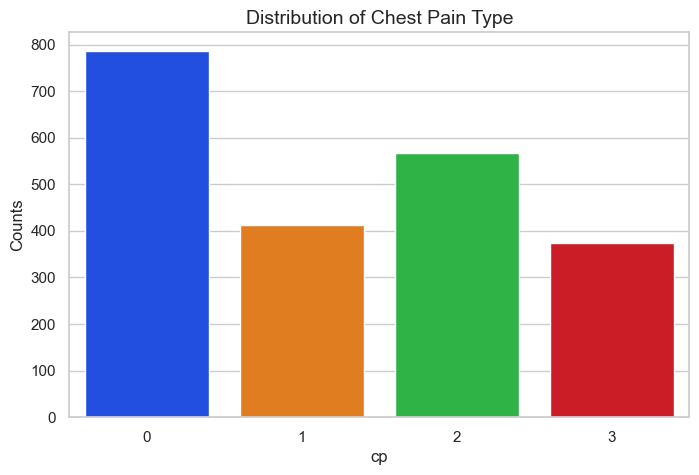

In [720]:
plt.figure(figsize=(8, 5))
sns.countplot(x='cp', data=merged_df, palette='bright')
plt.title('Distribution of Chest Pain Type', fontsize=14)
plt.ylabel('Counts', fontsize=12)
plt.show()


C:\Users\elida\AppData\Local\Temp\ipykernel_5424\3760598570.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='fbs', data=merged_df, palette='bright')


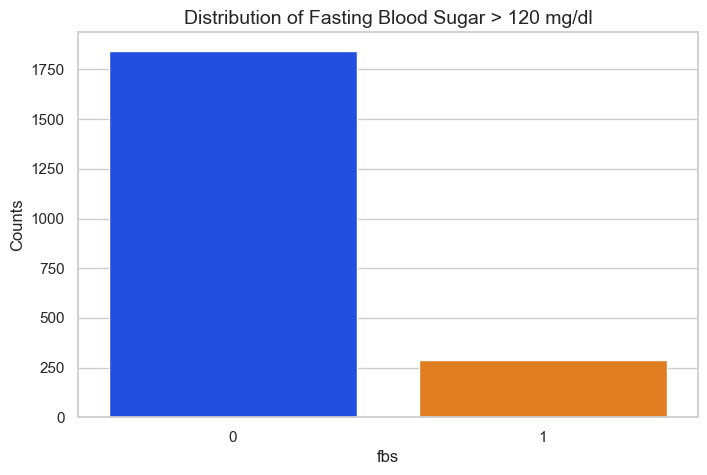

In [721]:
plt.figure(figsize=(8, 5))
sns.countplot(x='fbs', data=merged_df, palette='bright')
plt.title('Distribution of Fasting Blood Sugar > 120 mg/dl', fontsize=14)
plt.ylabel('Counts', fontsize=12)
plt.show()

C:\Users\elida\AppData\Local\Temp\ipykernel_5424\2931777793.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='restecg', data=merged_df, palette='bright')


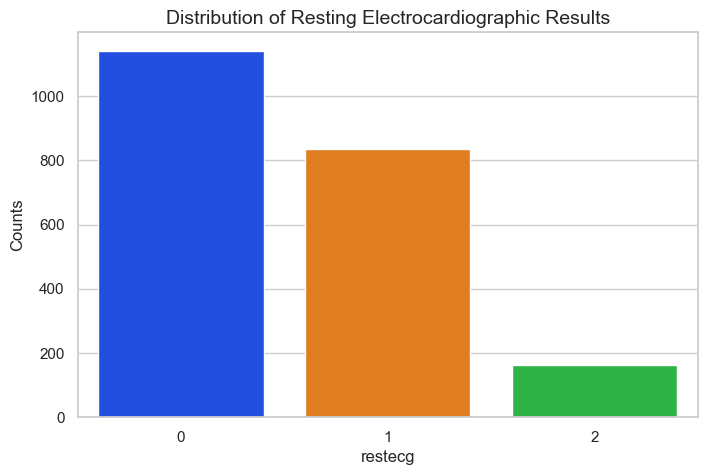

In [722]:
plt.figure(figsize=(8, 5))
sns.countplot(x='restecg', data=merged_df, palette='bright')
plt.title('Distribution of Resting Electrocardiographic Results', fontsize=14)
plt.ylabel('Counts', fontsize=12)
plt.show()


C:\Users\elida\AppData\Local\Temp\ipykernel_5424\451607200.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='exang', data=merged_df, palette='bright')


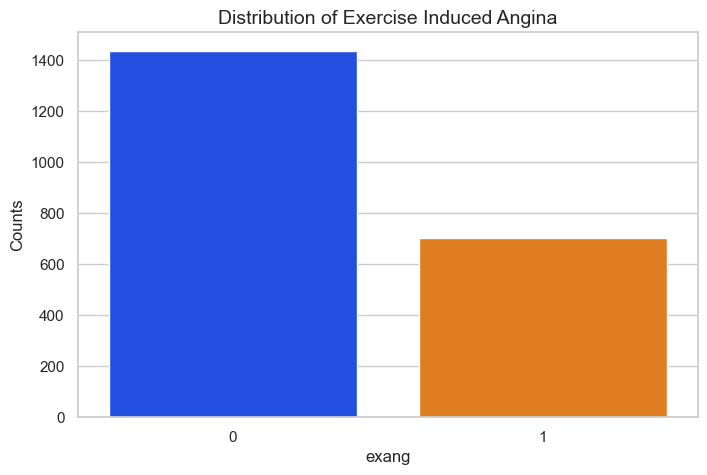

In [723]:
plt.figure(figsize=(8, 5))
sns.countplot(x='exang', data=merged_df, palette='bright')
plt.title('Distribution of Exercise Induced Angina', fontsize=14)
plt.ylabel('Counts', fontsize=12)
plt.show()


C:\Users\elida\AppData\Local\Temp\ipykernel_5424\49809112.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='slope', data=merged_df, palette='bright')


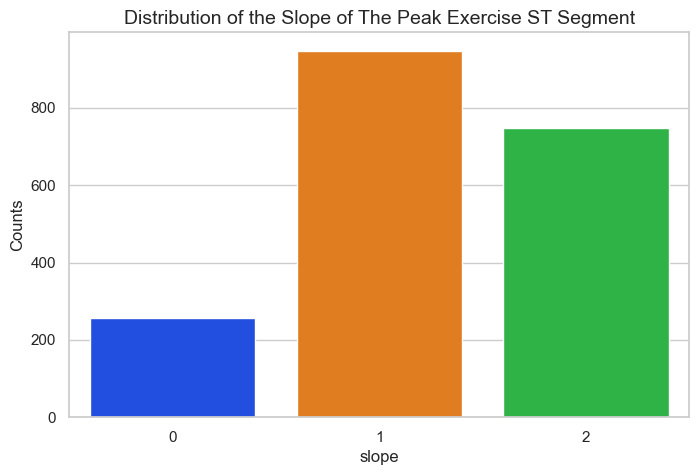

In [724]:
plt.figure(figsize=(8, 5))
sns.countplot(x='slope', data=merged_df, palette='bright')
plt.title('Distribution of the Slope of The Peak Exercise ST Segment', fontsize=14)
plt.ylabel('Counts', fontsize=12)
plt.show()

C:\Users\elida\AppData\Local\Temp\ipykernel_5424\34006310.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='ca', data=merged_df, palette='bright')


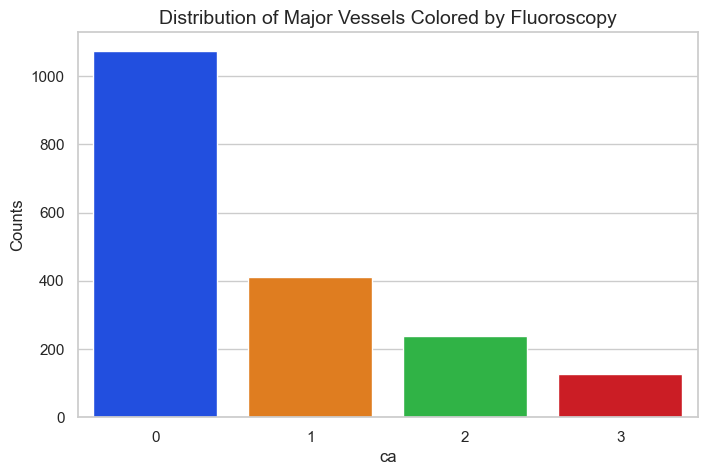

In [725]:
plt.figure(figsize=(8, 5))
sns.countplot(x='ca', data=merged_df, palette='bright')
plt.title('Distribution of Major Vessels Colored by Fluoroscopy', fontsize=14)
plt.ylabel('Counts', fontsize=12)
plt.show()


C:\Users\elida\AppData\Local\Temp\ipykernel_5424\4072959743.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='thal', data=merged_df, palette='bright')


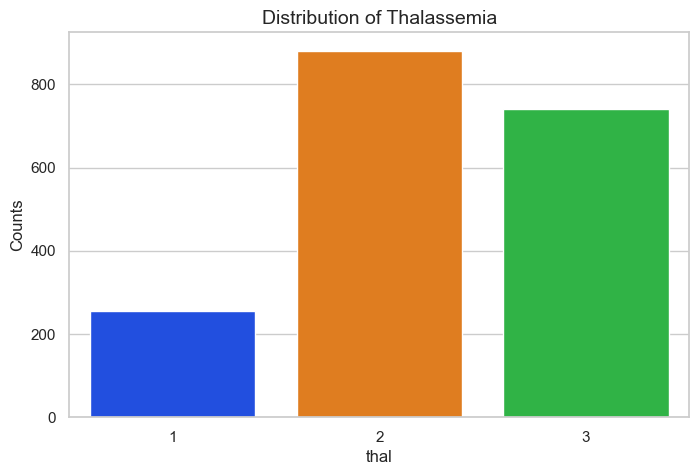

In [726]:
plt.figure(figsize=(8, 5))
sns.countplot(x='thal', data=merged_df, palette='bright')
plt.title('Distribution of Thalassemia', fontsize=14)
plt.ylabel('Counts', fontsize=12)
plt.show()


C:\Users\elida\AppData\Local\Temp\ipykernel_5424\603104151.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='target', data=merged_df, palette='bright')


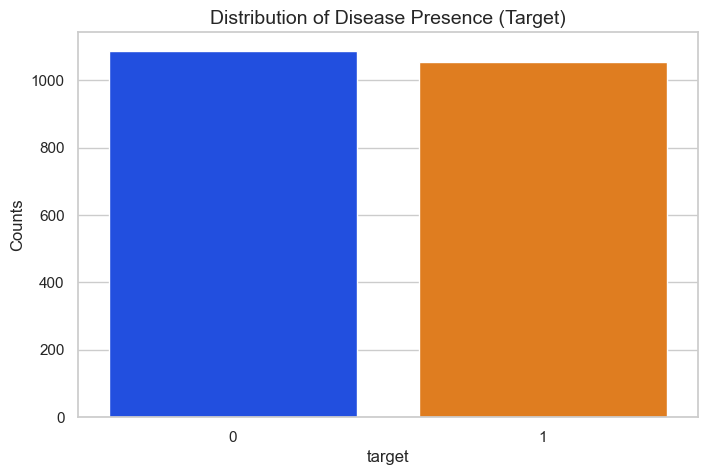

In [727]:
plt.figure(figsize=(8, 5))
sns.countplot(x='target', data=merged_df, palette='bright')
plt.title('Distribution of Disease Presence (Target)', fontsize=14)
plt.ylabel('Counts', fontsize=12)
plt.show()
